In [47]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [48]:
#%cd ./gdrive/My Drive/proyecto/

In [49]:
#%pwd

In [50]:
#%ls

In [51]:
!pip install pyts

In [52]:
'''from google.colab import files
uploaded = files.upload() # then browse, select the files. It's then uploaded'''

"from google.colab import files\nuploaded = files.upload() # then browse, select the files. It's then uploaded"

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
import scipy.io as sc

from scipy.signal import freqz


In [54]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_bandpass_bode (b ,a):
    angularFreq, freqResponse, phaseResponse = scipy.signal.bode(scipy.signal.lti(b, a))

    return angularFreq, freqResponse, phaseResponse


**Funciones del filtro butterworth pasabanda**

Las funciones describen el comportamiento de un filtro pasabanda butterworth definido por la libreria de scipy.signal, esta nos brinda la posibilidad de establecer unas freceuncias de corte definidas. A partir de ello, se obtienen los coeficientes que caracterizan el filtro, para después filtar la señal X deseada.

In [55]:
#funcion de calculo de la energia

def signalEnergy(signalInput):  
  sum = 0
  #print(len(signalInput))
  for k in range(len(signalInput)):
        sum+=pow(signalInput[k],2)     
    
    
  energiaSenal = sum
  #print('energia', energiaSenal)
  return energiaSenal


#Funcion que calcula las caracteristicas de la señal 

def dataMeasuring(origiSignal, f ,Zxx):
  #energySignalLoc = signalEnergy(origiSignal)

  absZxx =np.abs(Zxx)

  maximos = np.max(absZxx, axis=1)

  idx_Pot_ord = np.argsort(maximos)

  idx_Pot_ord = idx_Pot_ord[-4:]

  MaxSpectro = np.max(absZxx)
  idFrecMax = np.where(absZxx == MaxSpectro)
  frecPMax = f[idFrecMax[0]]  

  #varianza,media,minimo,maximos

  varP = np.var(maximos)
  maxP = np.max(maximos)
  maxAux = np.max(f[idx_Pot_ord])
  meanP = np.mean(maximos)
  minP = np.min(maximos)

  #print('frecMax',MaxSpectro)
  #print('max', maxP)


  dataArray=[MaxSpectro, frecPMax, varP, maxP, meanP, minP]

  return dataArray




**Funciones de calculo de variables**

Las funciones anteriores determinan el calculo de las caracteristicas D solicitadas 

muestreo 100


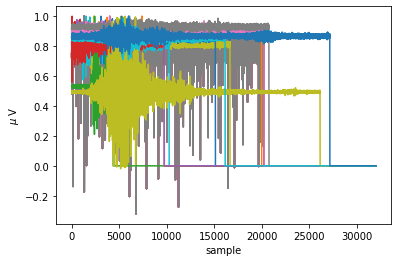

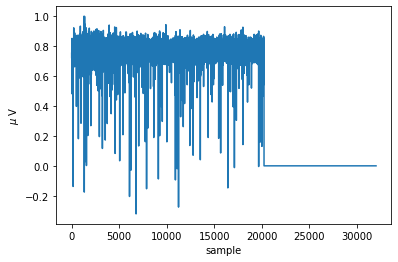

In [56]:
#Tele
data_tele = sc.loadmat('sisTele.mat')
#data_tele = sc.loadmat('sisTele.mat")
data_tele.keys() # variables del diccionario

Y_tele = data_tele['Y']
fs_tele = data_tele['fs']
fs_tele = fs_tele[0][0]
print("muestreo",fs_tele)


plt.plot(Y_tele.T) #se le hace transpuesta
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.show()
sampleSignal = Y_tele[3,:] # se extrae una señal de la base de datos
plt.figure
plt.plot(sampleSignal)
yy = sampleSignal
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.show()


#regional 

data_reg = sc.loadmat('sisReg.mat')
data_reg.keys() # variables del diccionario

Y_reg = data_reg['Y']
fs_reg = data_reg['fs']

#Local


data_loc = sc.loadmat('sisLoc.mat')
data_loc.keys() # variables del diccionario

Y_loc = data_loc['Y']
fs_loc = data_loc['fs']

**Detección de señales**

En esta seccion se implmentó con la señal de telesismos, unas pruebas, a mode de verificar si las señales eran las correctas y si se graficaban tal como se esperaba

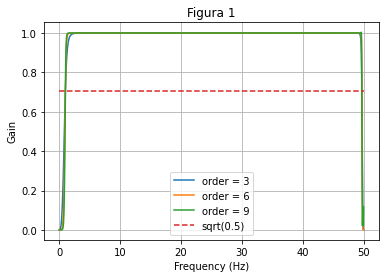

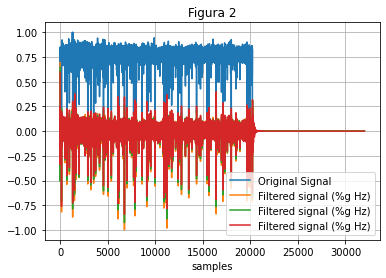

In [57]:
fs = fs_tele
lowcut = 1 #hz
highcut = 49.7 #hz

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
  b, a = butter_bandpass(lowcut, highcut, fs, order)
  w, h = freqz(b, a, worN=2000)
  plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.title('Figura 1')
plt.grid(True)
plt.legend(loc='best')

plt.figure(2)
plt.clf()
plt.plot(yy, label='Original Signal')

for order in [3, 6, 9]:
  y = butter_bandpass_filter(yy, lowcut, highcut, fs, order) 
  plt.plot(y, label='Filtered signal (%g Hz)' )
  plt.xlabel('samples')
  plt.grid(True)
  plt.axis('tight')
  plt.title('Figura 2')
  plt.legend(loc='lower right')

plt.show()

**Analisis del comportamiento del filtro butterworth**

Las graficas anteriores muestran el comportamiento del filtro que deseamos utilizar en este caso de estudio, en la figura 1 es posible determinar que a pesar de que el orden del filtro es modificado en cada iteracion para su graficación. Su comportamiento es casi contante, es decir, solo analizamos cambiamos cuasi-visibles en las subidas de ganancia y en las bajadas (unas pequeñas ondulaciones)

En la Figura 2, probamos el comportamiento del filtro en una señal del banco de sismos, y a pesar de que claramente, filtra la señal en algunas componentes, los, comportamientos no varian mucho uno de otros, por lo tanto escogimos el orden que mas limita la banda, mediante observación determinamos que el 9 es el que nos puede servir mejor en el analisis del proyecto

Finalmente, es importante mencionar que el filtro que implementamos le quite el valor DC a la señal lo que provoca un desplazamiento de la señal filtrada hacia abajo. No afecta los resulatdos futuros, por lo tanto seguimos, en la realización de los proximos literales.

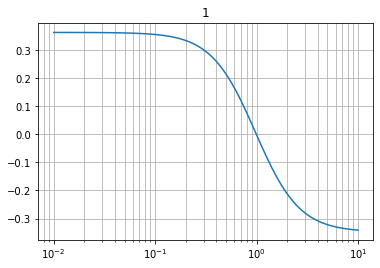

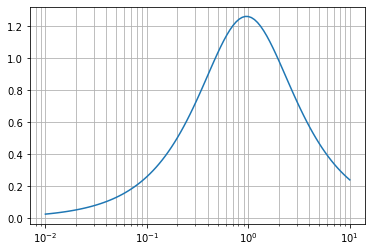

<Figure size 720x360 with 0 Axes>

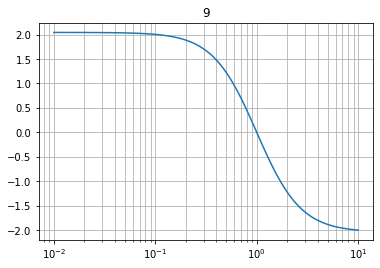

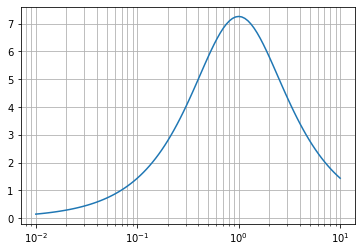

<Figure size 720x360 with 0 Axes>

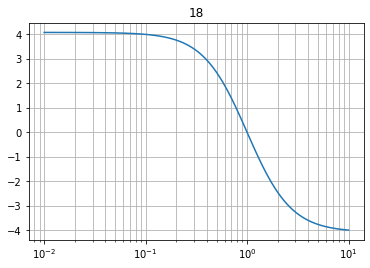

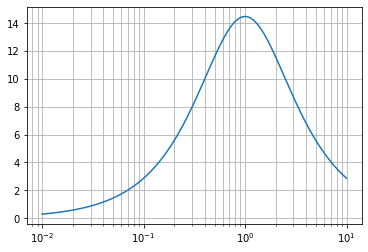

<Figure size 720x360 with 0 Axes>

In [58]:
import scipy.signal 

#matrices vacias
signalFilteredTele = np.zeros((Y_tele.shape[0],Y_tele.shape[1]))
signalFilteredLoc = np.zeros((Y_loc.shape[0],Y_loc.shape[1]))
signalFilteredReg = np.zeros((Y_reg.shape[0],Y_reg.shape[1]))

fs = fs_tele

lowcut = 1
highcut = 49.7
order = 9

for i in [1,9,18]: # diagramas de bode
  b, a = butter_bandpass(lowcut, highcut, fs, i)
  
  angularFreq, freqResponse, phaseResponse = butter_bandpass_bode(b,a)
  plt.figure(i)
  plt.semilogx(angularFreq, freqResponse)
  plt.grid(True, which = "both")
  plt.title(i)
  plt.figure(i+1)
  plt.semilogx(angularFreq, phaseResponse)
  plt.grid(True, which = "both")

  plt.figure(figsize=(10,5))
  
for j in range (0,Y_tele.shape[0]): # señales filtradas
  signalFilteredTele[j,:] = butter_bandpass_filter(Y_tele[j,:], lowcut, highcut, fs, order)
  signalFilteredReg[j,:] = butter_bandpass_filter(Y_reg[j,:], lowcut, highcut, fs, order)
  signalFilteredLoc[j,:] = butter_bandpass_filter(Y_loc[j,:], lowcut, highcut, fs, order)
  #print(j)
  #print(signalFilteredLoc[j,:10])


**Filtro Butterworth**

Se escoge el filtro butterworth ya que cuando hacemos la frecuencia de corte igual a uno se normaliza la señal resultante que sale del filtro.
En los filtros tipo butterworth la respuesta en frecuencia es extremadamente plana en la banda de paso y no genera ondulaciones lo cual es una ventaja para el tipo de señales que se estan trabajando.
Es necesario que la pendeinte de atenuacion del filtro que se va a implementar sea pequeña para que el rango sea preciso, por lo tanto es necesario que el orden de nuestro filtro sea grande.
El diagrama de bode permite representar la magnitud y la fase de la función de transferencia de un sistema

Es importante mencionar que no se escogio la frecuencia de corte de 50Hz, porque tendriamos que tener un filtro que exactamente en 50Hz baje a 0Hz y esto es teoricamente posible pero en la practicas habrian problemas de incompatibilidad , el roll off tendria un pendiente infinita, por lo que el filtro no funcionaria correctamente, por lo tanto, se escoge una frecuencia de corte superior de 49.7 Hz, lo cual permite un roll off finito que logre cumplir las condiciones solicitadas

**Descomposicion de la señales de cada tipo**

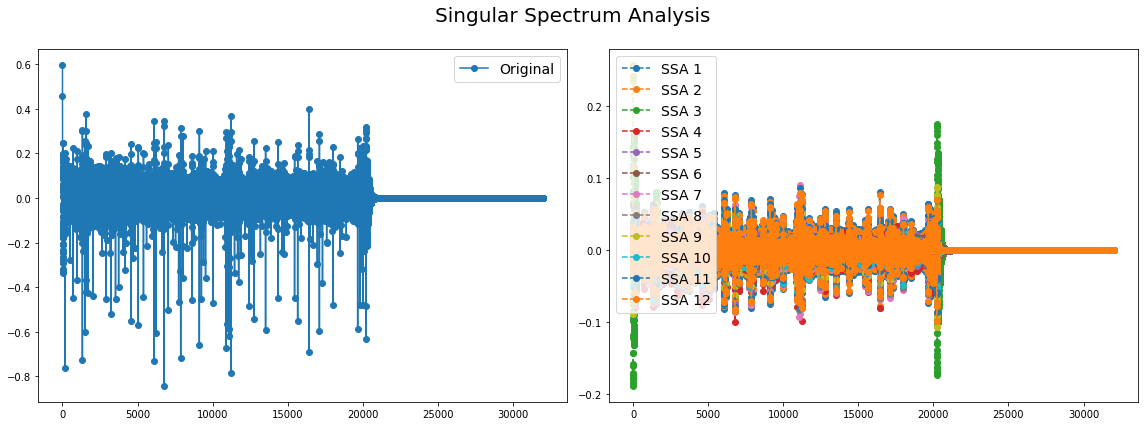

[ 0.02498987  0.08995472  0.08095623  0.03675461 -0.00163647 -0.01282052
 -0.00698123 -0.00015971 -0.00174027 -0.007615  ]
[ 0.0253298   0.14067294  0.01226151  0.0403089  -0.00173699  0.01887942
 -0.01531079  0.00501381 -0.01923549  0.0036232 ]


In [59]:
x_tele = signalFilteredTele
groups = 12
ssaTele = SingularSpectrumAnalysis(window_size=groups)
X_ssaTele = ssaTele.fit_transform(x_tele)

#señal original 
plt.figure(figsize=(16, 6))
idSignal = 0
ax1 = plt.subplot(121)
ax1.plot(x_tele[idSignal], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(groups):
    ax2.plot(X_ssaTele[idSignal, i], 'o--', label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

#Regional 

x_reg = signalFilteredReg
ssaReg = SingularSpectrumAnalysis(window_size=groups)
X_ssaReg = ssaReg.fit_transform(x_reg)

print(X_ssaReg[10,2,:10])

#Local 

x_loc = signalFilteredLoc
ssaLoc = SingularSpectrumAnalysis(window_size=groups)
X_ssaLoc = ssaLoc.fit_transform(x_loc)

print(X_ssaLoc[10,2,:10])

**Descomposición de la señal**

Realizamos descomposicion de las señales con el fin de tener una representación mas detallada de la señal original y a su vez poder obtener informacion extra fundamental que ayuda a mejorar el comportamiento de los daragramas y la implmentación en seaborn. 

Teoricamente, al aumentar la medidad de descomposición la caracterizacion y diferenciacion de grupos en un sistema es mas evidente, pero se lucha con mas complejidad computacional y velocidad de ejecución del kernel de google colab; como se trabaja con recursos limitados es importante determinar hasta que medida es viable separa las señales 



**Se realiza la STFT y se realizan las matrices de 63xD para cada tipo de señal**

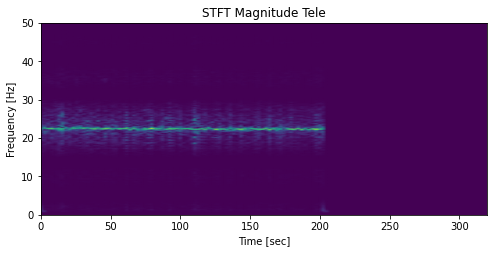

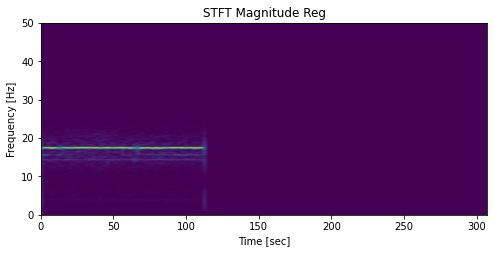

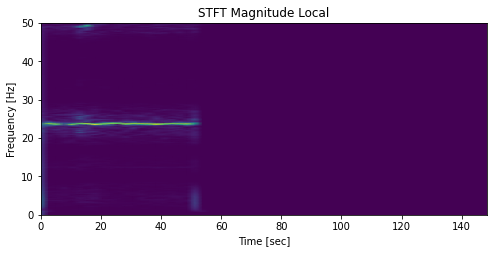

In [60]:
from scipy import signal

f2,t2, Zxx2 = signal.stft(X_ssaTele[0,1], fs, nperseg = 512)
absZxx2 =np.abs(Zxx2)
plt.figure(figsize=(8,12))
plt.subplot(3,1,1)
plt.pcolormesh(t2,f2,absZxx2, shading="gouraud")
plt.title('STFT Magnitude Tele')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

f3,t3, Zxx3 = signal.stft(X_ssaReg[0,1], fs, nperseg = 512)
absZxx3 =np.abs(Zxx3)
plt.figure(figsize=(8,12))
plt.subplot(3,1,2)
plt.pcolormesh(t3,f3,absZxx3, shading="gouraud")
plt.title('STFT Magnitude Reg')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

f,t, Zxx = signal.stft(X_ssaLoc[0,1], fs, nperseg = 512)

absZxx =np.abs(Zxx)
plt.figure(figsize=(8,12))
plt.subplot(3,1,3)
plt.pcolormesh(t,f,absZxx, shading="gouraud")
plt.title('STFT Magnitude Local')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()



**STFT señales locales, tele y regional**

Se sacarón las STFT de diferentes señales de la descomposición especificamente la primera sub señal,esto evidencia que el rango donde la señal tiene mayor intensidad en cada una, esta entre los 20Hz y 30Hz. Se observa que la señal que mantiene una intensidad con una mayor duración es la de telesismo, es decir, unos 200 segs(con variaciones visibles), la regional con una duracion de alta intensidad de unos 120 aproximadamente y la local en unos 70 segs, datos que pueden servir tambien como otro parametro D de caracterización. 

In [61]:
indexInit = 21*groups

In [62]:
energyFlag = True
DLoc = np.zeros((indexInit,7))
con = 0

print()
for i in range(X_ssaLoc.shape[0]):
  for j in range(groups):
    f,t, Zxx = signal.stft(X_ssaLoc[i,j], fs, nperseg = 512)
    
    energia = signalEnergy(X_ssaLoc[i,j])
    #print('señal ', i, j , 'Energia', energia)

    dataArraySignalLoc = []

    dataArraySignalLoc = dataMeasuring(X_ssaLoc[i,j], f, Zxx)     

    dataArraySignalLoc.append(energia)

    DLoc[con] = dataArraySignalLoc

    #print(DLoc[con])
    
    con+=1








In [63]:
DReg = np.zeros((indexInit,7))
con2 = 0

for i in range(X_ssaReg.shape[0]):
  for j in range(groups):
    f,t, Zxx = signal.stft(X_ssaReg[i,j], fs, nperseg = 512)

    energiaReg = signalEnergy(X_ssaReg[i,j])
    #print('señal ', i, j , 'Energia', energiaReg)

    dataArraySignalReg = []

    dataArraySignalReg = dataMeasuring(X_ssaReg[i,j], f, Zxx)  

    dataArraySignalReg.append(energiaReg)      

    DReg[con2] = dataArraySignalReg

    #print(dataArraySignalReg)

    con2+=1

In [64]:
DTele = np.zeros((indexInit,7))
con3 = 0

for i in range(X_ssaTele.shape[0]):
  for j in range(groups):
    f,t, Zxx = signal.stft(X_ssaTele[i,j], fs, nperseg = 512)

    energiaTele = signalEnergy(X_ssaTele[i,j])
    #print('señal ', i, j , 'Energia', energiaTele)


    dataArraySignalTele = []

    dataArraySignalTele = dataMeasuring(X_ssaTele[i,j], f, Zxx)   

    dataArraySignalTele.append(energiaTele)  

    DTele[con3] = dataArraySignalTele

    #print(dataArraySignalTele)

    con3+=1

**Concatenación de las señales**

Concatenamos las señales de tele (63xD), reg (63xD), local (63xD) con sus caracteristicas en una misma para empezar a realizar los dataframes, es decir una matriz final de, [[63XD];[63XD];[63XD]], siendo ';' un cambio de fila 

In [65]:
# DTele DReg DLoc
print(indexInit)
indexInit2p1 = indexInit + 1
indexInit2p2 = indexInit2p1 +indexInit
indexInit3p1 = indexInit2p2 + 1
indexInit3p2 = indexInit3p1 + indexInit
print(indexInit3p2)

matrixFinalConcat = np.zeros((indexInit3p2,7))
concatSignals = [[DTele],[DReg], DLoc]
matrixFinalConcat[:indexInit,:] = DTele
matrixFinalConcat[indexInit2p1:indexInit2p2,:] = DReg
matrixFinalConcat[indexInit3p1:indexInit3p2,:] = DLoc

#print(matrixFinalConcat[:5,:])
mixTags = ["" for x in range(indexInit3p2)]
#print(len(strs))


for i in range(0,indexInit,1):
  mixTags[i] = ("Tele")
for j in range(indexInit,indexInit2p2,1):
  mixTags[j] = ("Reg")
for l in range(indexInit2p2,indexInit3p2,1):
  mixTags[l] = ("Loc")
  

print(len(mixTags))


#tengo la matriz concatenada con todos los datos disponibles de las señales 

'''normalizeX = False
if normalizeX == True:
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  matrixFinalConcat = scaler.fit_transform(matrixFinalConcat)'''




252
758
758


'normalizeX = False\nif normalizeX == True:\n  from sklearn.preprocessing import StandardScaler\n  scaler = StandardScaler()\n  matrixFinalConcat = scaler.fit_transform(matrixFinalConcat)'

**Creación de los dataframes con los datos de las 3 matrices de 63xD**

In [66]:
import pandas as pd
import seaborn as sns

# Dataframe de un nparray
df = pd.DataFrame(matrixFinalConcat,columns=['MaxPotencia', 'MaxFrecuencia', 'Varianza', 'Maximo', 'Media', 'Minimo', 'Energia'])

df['Tipo'] = mixTags

df

,MaxPotencia,MaxFrecuencia,Varianza,Maximo,Media,Minimo,Energia,Tipo
0,0.011088,22.656250,2.151275e-06,0.011088,0.000964,0.000182,4.779541,Tele
1,0.009307,22.656250,1.784587e-06,0.009307,0.000759,0.000053,3.559091,Tele
2,0.028341,1.367188,1.716345e-05,0.028341,0.001367,0.000048,4.519968,Tele
3,0.007481,35.351562,2.076311e-06,0.007481,0.000766,0.000036,1.943195,Tele
4,0.005025,35.351562,1.269137e-06,0.005025,0.000731,0.000007,1.461686,Tele
...,...,...,...,...,...,...,...,...
753,0.001956,7.617188,1.279989e-07,0.001956,0.000522,0.000197,0.091657,Loc
754,0.001272,10.546875,8.047705e-08,0.001272,0.000382,0.000128,0.062253,Loc
755,0.001155,10.546875,8.139727e-08,0.001155,0.000358,0.000070,0.061230,Loc
756,0.001776,25.976562,2.012656e-07,0.001776,0.000279,0.000002,0.093383,Loc


**Seaborn con una subdivision de 12 de la señal original**

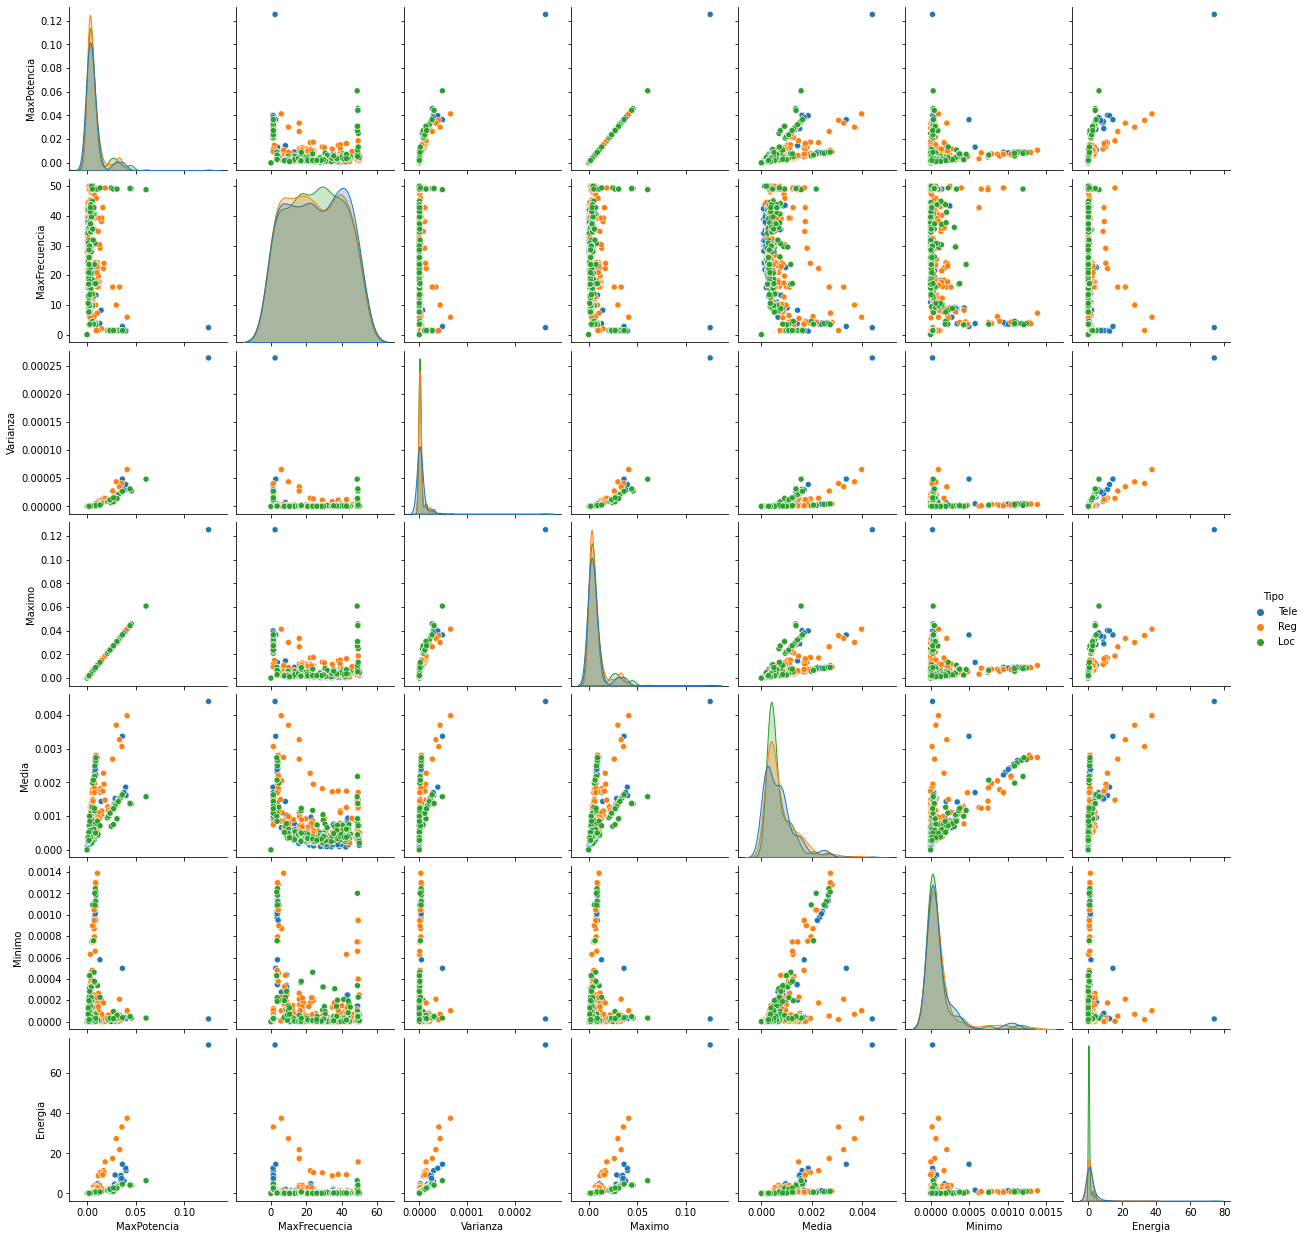

In [70]:
sns.pairplot(df, hue="Tipo")
sns.set_style('whitegrid')


**Seaborn con una subdivision de 20 de la señal original**

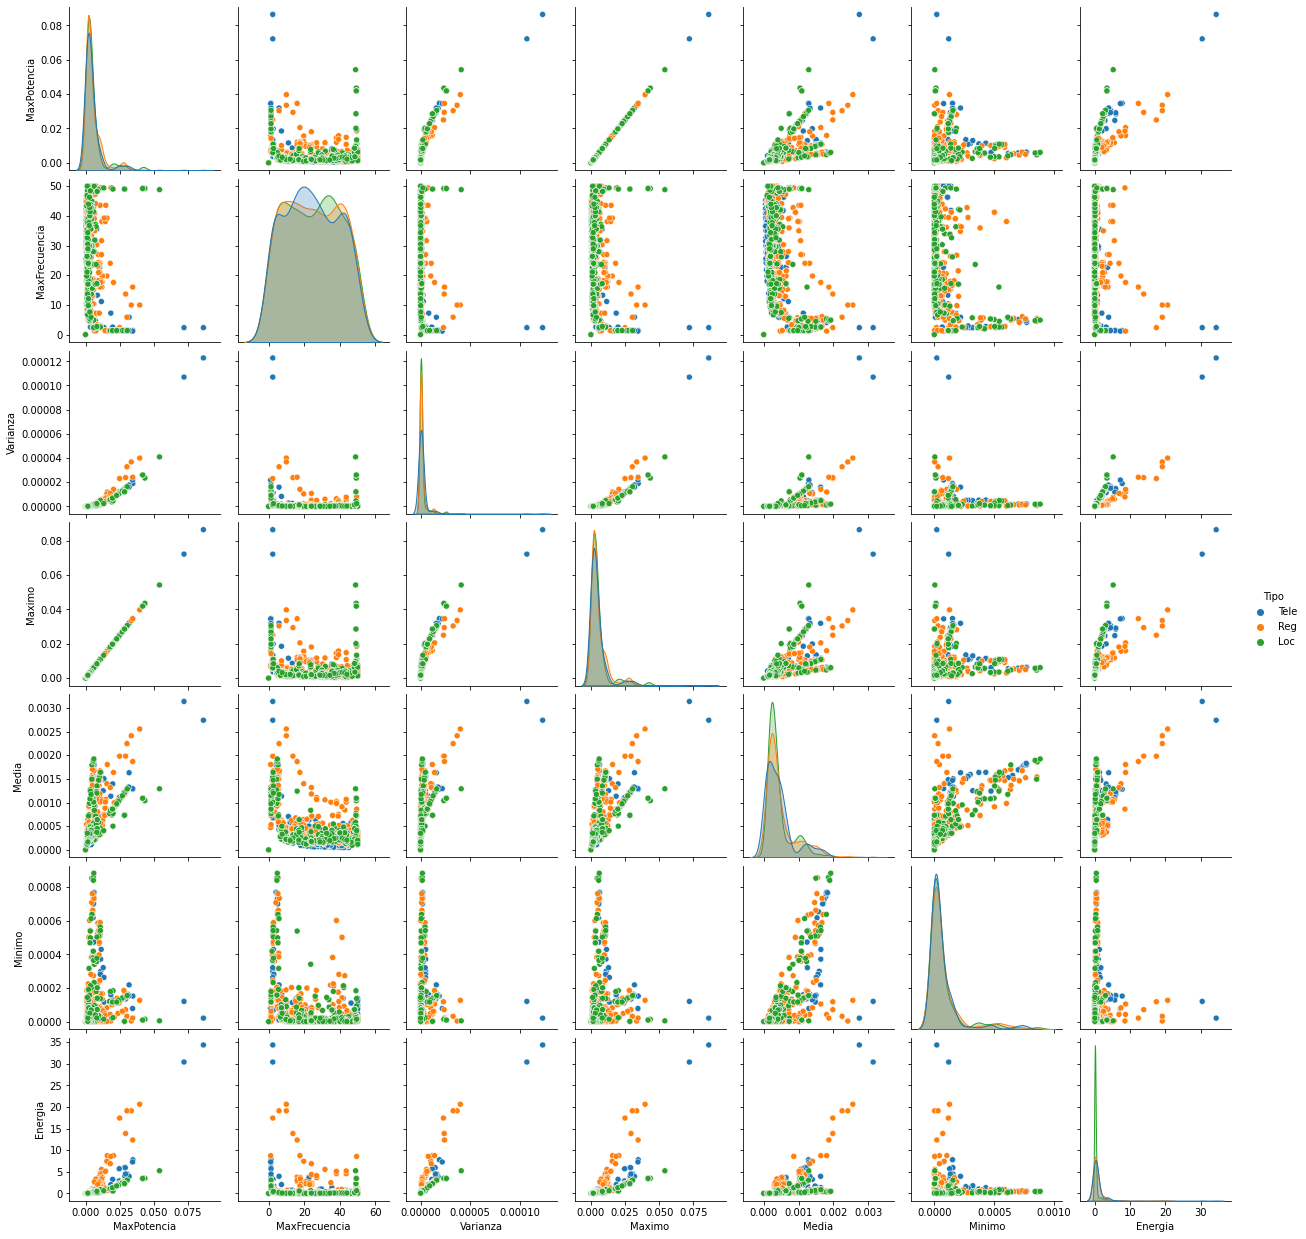

**Seaborn con una subdivision de 40 de la señal original**

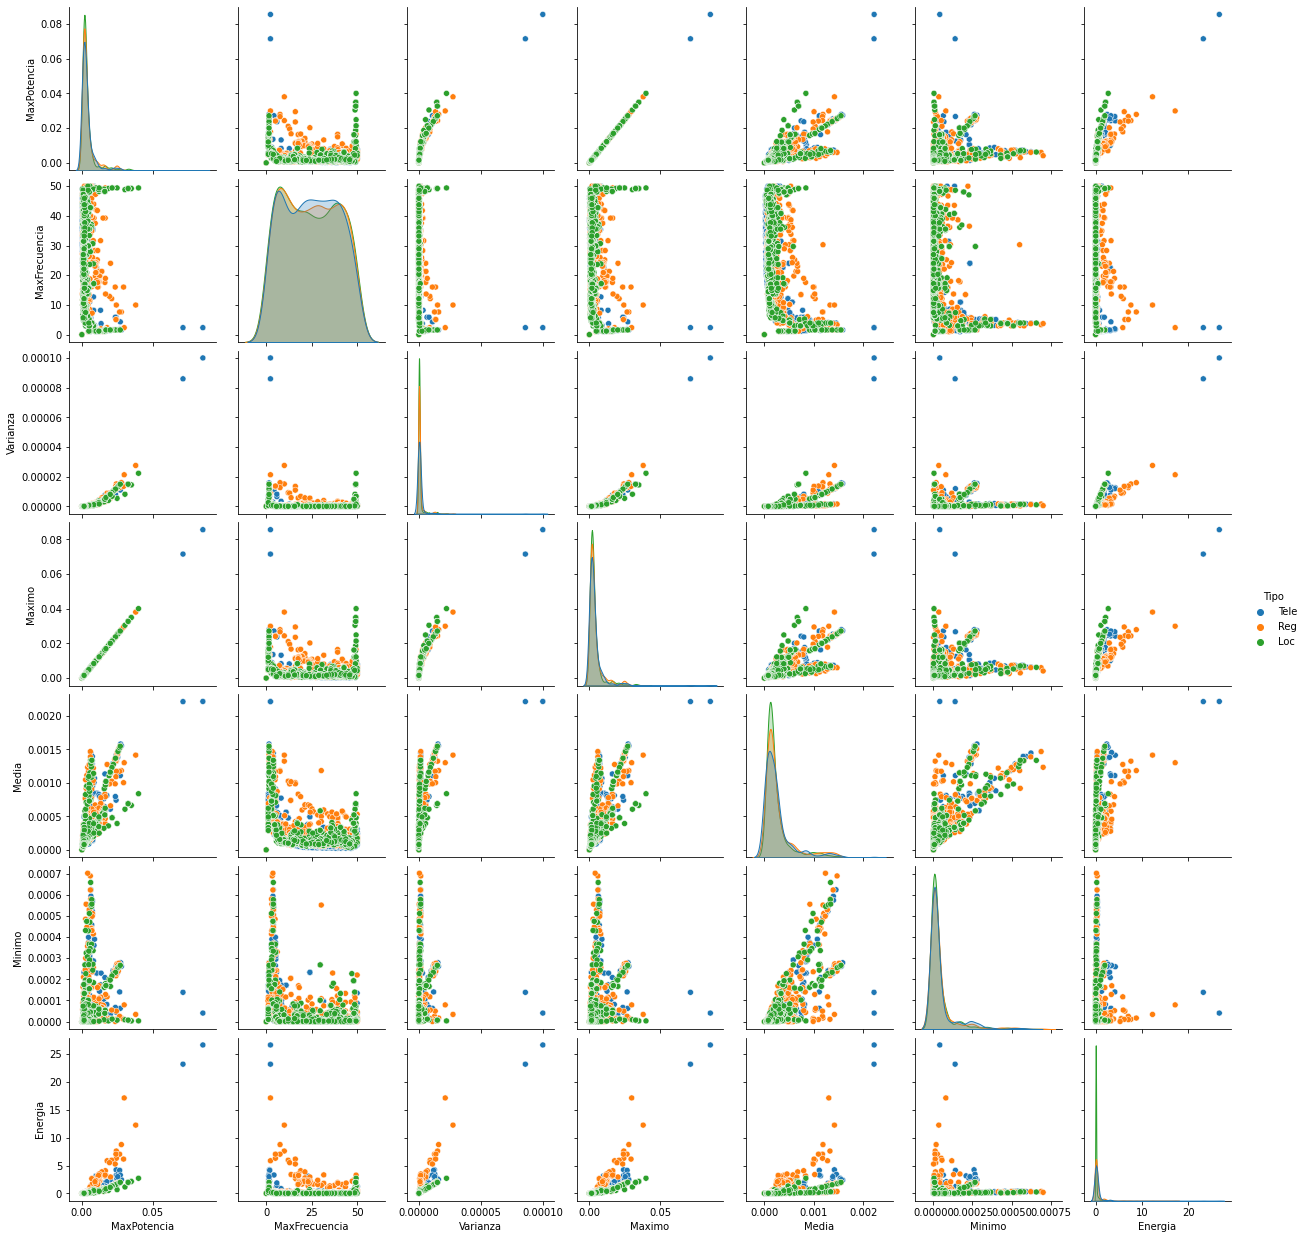

**Datos para la caracterización**

En las graficas anteriores se observan diferentes escenarios donde la señal original es subdividida o descompuesta en diferentes magnitudes(12,20,40), cada una de ellas con resultados relevantes que dan luz para una futura clasificacion de clases de señales, en este caso, poder determinar cual es una señal de telesismo, sismo Local o sismo regional.

**Descomposición de 12**

Se logra observar que en los parametros de frecuencia maxima y media, la distribución de los datos difiere de una manera considerable a comparación con la distribucion de los otros parametros expuestos.

A pesar de que los datos se enceuntran dispersos de una manera un poco desorganizada y dificil para la clasificación, se pudo determinar que el parametro de la energia es un factor relevante,puesto que al ser comparado con potencia, frecuencia, varizana y media; es posible determinar circunferencias de clasficacion de datos. Otro parametro interesante, es la media en comparación con la frecuencia y los minimos de potencia, pues la concentración de datos locales es mucho mayor en magnitudes pequeñas que magnitudes mayores tal como se concentran la de los sismos regionales y telesismos. 

**Descomposición de 20**

Se observa una mayor cantidad de datos en cada grafica, también es visible la manera en que los sismos locales tienen mayor concentración en puntos especificos, todo lo contrario a los regionales y tele que se encuentran mucho mas dispersos y dificiles para una futura clasificion o posicionamento de umbrales de decision.

Se mantiene la tendencia de la energia, ya que se logra determinar las circunferencias de clasificicacion bastante evidentes, asi como en factores que gracias a un mayor numero de descomposiciones se vuelven relevantes para la separacion de datos, tales pueden ser maxima potencia vs max frecuencia, datos locales tienen a variar poco de magnitud, contrarios a los sismos regionales que varian, mismo fenomeno sucede en la maxima frecuencia vs la media. 

**Descomposición de 40**

Finalmente, a manera de observar cambios determinantes, se probó una descomposicion de 40, osea el doble de la anterior, observamos cambios como: mayor cantidad de datos, la dispersion de los datos disminuyo y la distribucion de los datos mermó.

En la energia hubo un cambio importante pues, ya no era un factor determinante a la hora de clasificar datos , pues al disminuir la varianza de los datos, las circunferencias de clasificacion posibles, se volvieron cada vez mas pequeñas, al punto de generar problemas futuros. En comparación con la descomposicion de 20, esta es mas ineficiente, los datos en general se concentran en los mismo luages y no hay grandes cambios que ayudan a la caracterización eficiente de los datos. 

**Conclusiones**

Apesar de que el numero de descomposicones puede mejorar las graficas para una futura clasificación no es un factor determinante ni directamente proporcional, tal caso se evidenció en esta practica, donde la descomposición de 40 visiblemente se veía menos factible para clasificar que la de 20

Es importante mencionar que se hace necesario el uso de tecnicas de machine learning que ayuden a darle un mejor uso a los datos capturados, puesto que en tecnicas convencionales de clasificación puede ser algo tedioso y poco preciso
Tecnicas de SVM pueden ser la solucion a estos inconvenientes, pues su manera de clasificación inteligente se basa en cambiar la dimension de los datos de manera temporal y poder encontrar los mejores umbrales de decision posibles y descartando los datos que no sean provechosos.

Los temas expuestos en esta practica son de relevante cuidado, pues tomamos fenomenos naturales(reales), se les realiza un importante tratamiento de señales y luego se estudia la manera en que se distribuyen los datos. Aspectos y conocimiento que puede ser usado en ambientes multidisciplinarios que ayuden a entender los datos y estadisticas con un enfoque mas preciso y teniendo en cuenta diferentes perspectivas.


Es de caracter mandatorio, analizar el comportamiento de los filtros antes de utilizarlos en los datos, se observo que si se usaban los filtros con datos exactos se obtenian comportamientos contrarios a los solicitados, factores como el roll off tienen fuertes afectaciones en la creación de filtros. Finalmente, se determinó que el filtro pasabanda butterworth le quita el valor DC a la señal original, caso opuesto con el filtro pasabaja butterworth, ya que quitan las componetes frecuenciales no utiles y mantienen el valor DC. 

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
X = df.drop(['Tipo'], axis=1)
pca.fit(X)
X = pca.transform(X)

X = pd.DataFrame(X)

X['lbl'] = df['Tipo']

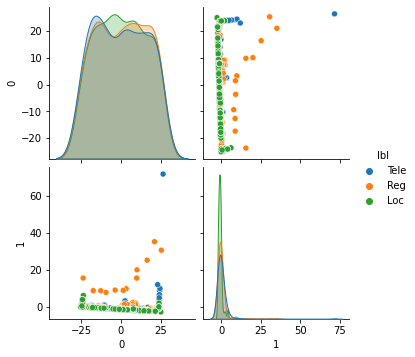

In [69]:
sns.pairplot(X, hue="lbl")